# Titanic Survival Prediction : Task 1

*Description:*
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

*Objective:*
- Understand the Dataset & cleanup (if required).
- Build a strong classification model to predict whether the passenger survives or not.
- Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.shape  #to check the rows in data

(891, 12)

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
#To check the null values in data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#Drop null values
data.dropna(inplace = True)

In [13]:
data.shape

(183, 12)

In [14]:
data.head(10)  #top 10 values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


#SURVIVAL RATE
**1) Count of Survival Passenger**

In [15]:
survival_count = data['Survived'].value_counts()
survival_count

Survived
1    123
0     60
Name: count, dtype: int64

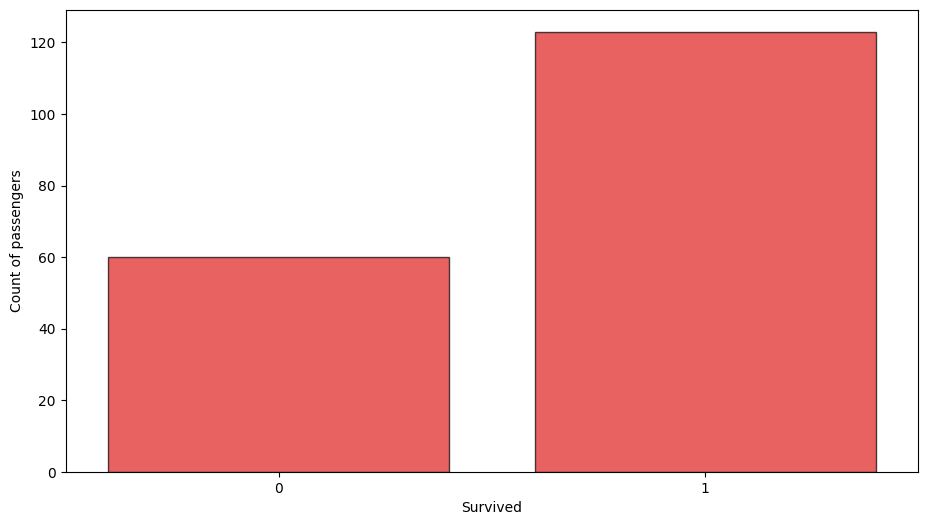

In [17]:
plt.figure(figsize = (11,6))
sns.countplot(data = data, x = 'Survived', color = 'red', edgecolor = 'black', alpha = 0.7)
plt.xlabel("Survived")
plt.ylabel("Count of passengers")
plt.show()


#DISTRIBUTION OF SURVIVAL

In [18]:
survival_count

Survived
1    123
0     60
Name: count, dtype: int64

In [19]:
total_passengers = data.shape[0]
total_passengers

183

In [20]:
survival_rate = survival_count / total_passengers * 100
survival_rate

Survived
1    67.213115
0    32.786885
Name: count, dtype: float64

#PIE CHART

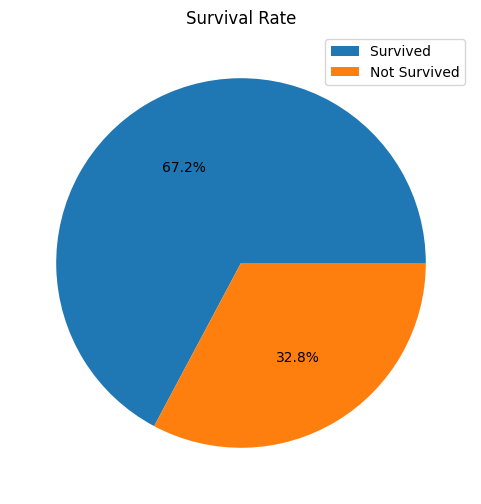

In [21]:
plt.figure(figsize = (11,6))
plt.pie(survival_rate, autopct = '%1.1f%%')
plt.title("Survival Rate")
plt.legend(['Survived ', 'Not Survived'])
plt.show()

#Observation:
- As per the Observation We have seen that only 67% passengers survived in titanic

#Passenger Class
- To find the count of passenger in each class

In [22]:
class_count = data['Pclass'].value_counts()
class_count

Pclass
1    158
2     15
3     10
Name: count, dtype: int64

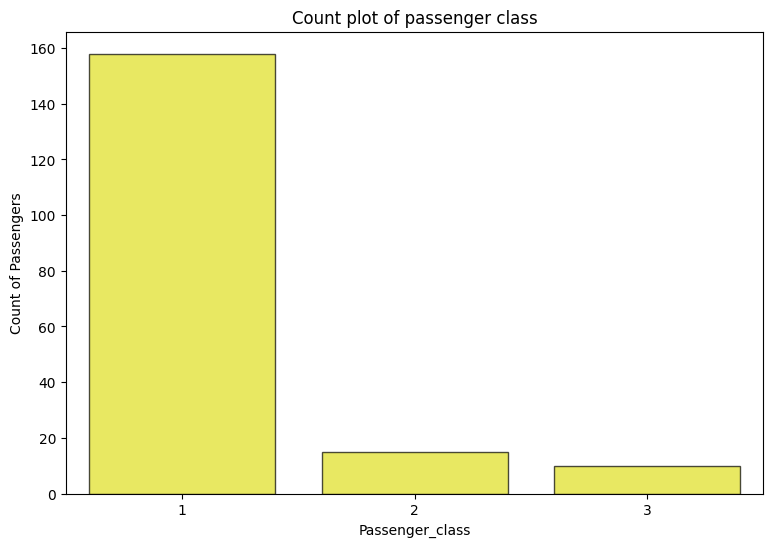

In [23]:
plt.figure(figsize = (9,6))
sns.countplot(data = data, x = 'Pclass', color = 'yellow', edgecolor = 'black', alpha = 0.7)
plt.title("Count plot of passenger class")
plt.xlabel('Passenger_class')
plt.ylabel('Count of Passengers')
plt.show()

#Proportion of Passenger class

In [25]:
class_proportion = class_count / total_passengers * 100
class_proportion

Pclass
1    86.338798
2     8.196721
3     5.464481
Name: count, dtype: float64

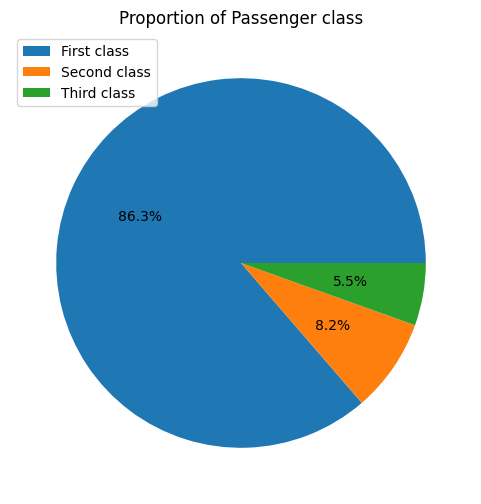

In [26]:
plt.figure(figsize = (11,6))
plt.pie(class_proportion, autopct = '%1.1f%%')
plt.title("Proportion of Passenger class")
plt.legend(['First class', 'Second class', 'Third class'])
plt.show()

#Survival by sex (Male/female)

In [27]:
sex_count = data['Sex'].value_counts()
sex_count

Sex
male      95
female    88
Name: count, dtype: int64

In [32]:
sex_survival = data.groupby(['Sex', 'Survived']).size().unstack()
sex_survival

Survived,0,1
Sex,,
female,6,82
male,54,41


#Stacked bar graph

<Figure size 1100x600 with 0 Axes>

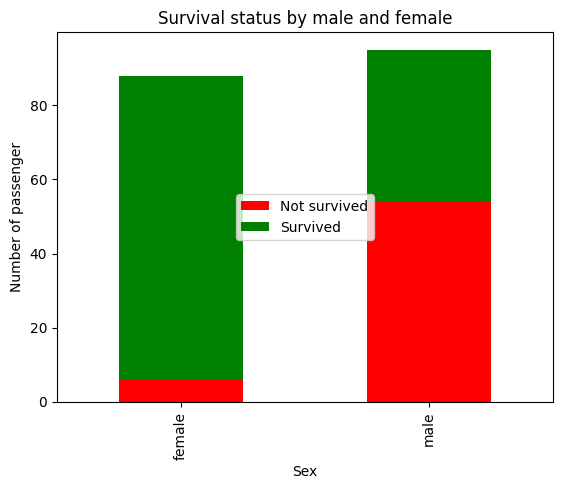

In [34]:
plt.figure(figsize = (11,6))
sex_survival.plot(kind = 'bar', stacked = True, color = ['Red', 'Green'])
plt.title("Survival status by male and female")
plt.xlabel('Sex')
plt.ylabel('Number of passenger')
plt.legend(['Not survived', 'Survived'], loc = 'center')
plt.show()

#Observation:
- As per the observation we have seen that 82 female passengers survived out of 88 female and 41 male passenger survived out of 95.
- Female passengers survived more than male passengers

#Survival By Age


In [35]:
#Convert flaot into int
data['Age'] = data['Age'].astype(int)

In [36]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S


In [37]:
#Grouping Age
age_bins = [0,18,30,50,100]
age_labels = ['0-17', '18-29', '30-49', '50+' ]

data['Age_group'] = pd.cut(data['Age'], bins = age_bins, labels = age_labels)


In [39]:
survival_age_group = data.groupby(['Age_group', 'Survived']).size().unstack()
survival_age_group

Survived,0,1
Age_group,,
0-17,3,19
18-29,13,33
30-49,28,54
50+,16,16


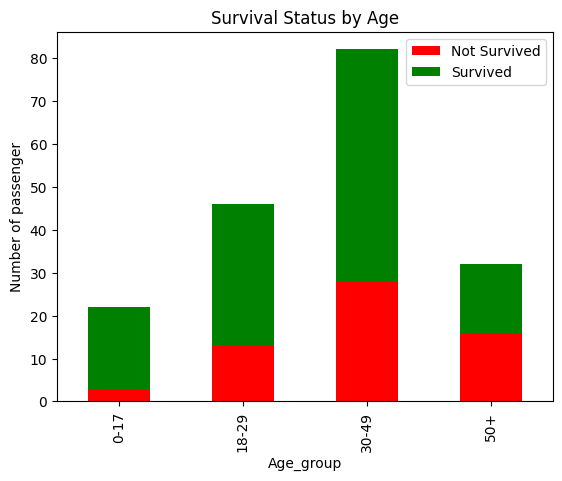

In [40]:
survival_age_group.plot(kind = 'bar', stacked = 'True', color = ['Red', 'Green'])
plt.title("Survival Status by Age")
plt.xlabel("Age_group")
plt.ylabel('Number of passenger')
plt.legend(['Not Survived', 'Survived'])
plt.show()

#Observation:
- As per the calculations 30-49 age group people survived more

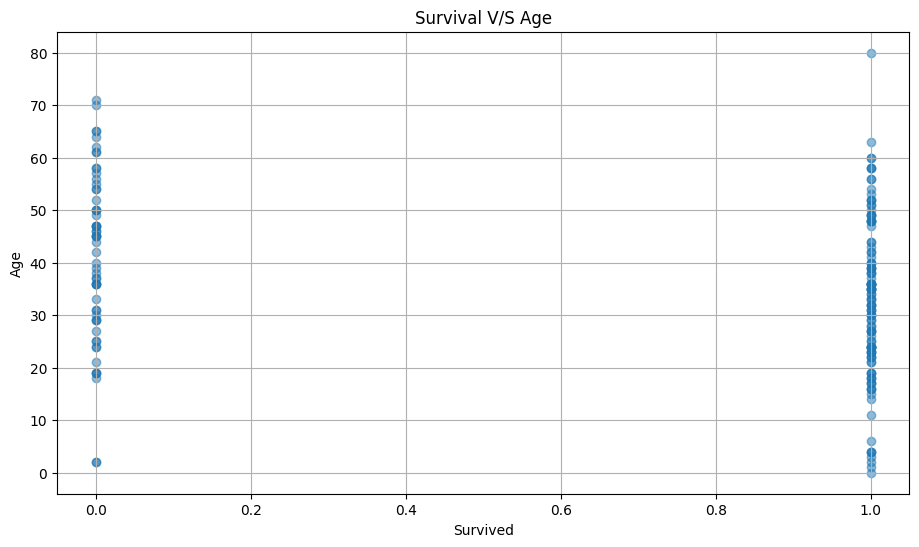

In [42]:
#correlation between age and survival

plt.figure(figsize = (11,6))
plt.scatter(data['Survived'], data['Age'], alpha = 0.5)
plt.title("Survival V/S Age")
plt.xlabel('Survived')
plt.ylabel('Age')
plt.grid(True)
plt.show()

#Observation:
- 0.0 SHOWS THE NOT SURVIVED AND 1.0 SHOES PASSENGERS SURVIVED
- WE HAVE SEEN THAT FROM 0 - 20 AGE GROUP LESS PASSENGER DIED
- AS PER THE OBSERVATION AGE INCREASES SURVIVAL RATE DECREASES
- IT SHOWS THE DIRECT RELATION

#Measure the central tendency of fare

In [46]:
#Mean of fare
round(data['Fare'].mean(),2)

78.68

In [47]:
#Median of fare
data['Fare'].median()

57.0

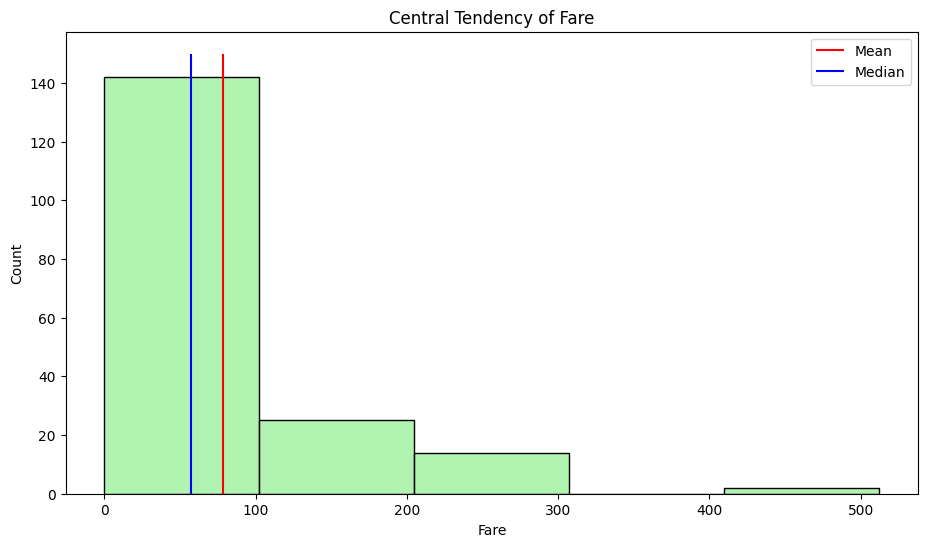

In [51]:
plt.figure(figsize = (11,6))
sns.histplot(data = data, x = 'Fare', color = 'lightgreen', edgecolor = 'black', alpha = 0.7, bins = 5)
plt.title("Central Tendency of Fare")
plt.xlabel('Fare')
plt.ylabel('Count')
plt.vlines(data['Fare'].mean(), ymin = 0, ymax = 150, color = 'red' , label = 'Mean')
plt.vlines(data['Fare'].median(), ymin = 0, ymax = 150, color = 'blue', label = 'Median')
plt.legend()
plt.show()

#Observation:
- We observe that this histogram is not well distributed, it is skewed a little towards the right.

- As we have seen skewness, therefore we can check the distribution using distplot function.

- The mean and the median are close to each other and the difference between them is very small.

In [52]:
data['Fare'].skew()

2.715882842469152